In [ ]:
import cv2
import numpy as np
import os 
import pandas as pd
import random as rd,math
import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/images'
files=[]
meansl=[]
m=[]
M=[]
c=0
for r,d,f in os.walk(path):
 for file in f:
  if('.jpeg' in file or '.jpg' in file):
    files.append(os.path.join(r,file))
    c+=1
print(files) 

['/content/drive/MyDrive/images/C4.jpg', '/content/drive/MyDrive/images/B7.jpg', '/content/drive/MyDrive/images/U3.jpg', '/content/drive/MyDrive/images/C1.jpg', '/content/drive/MyDrive/images/C8.jpg', '/content/drive/MyDrive/images/U2.jpg', '/content/drive/MyDrive/images/B1.jpg', '/content/drive/MyDrive/images/U4.jpg', '/content/drive/MyDrive/images/B13.jpg', '/content/drive/MyDrive/images/U6.jpg', '/content/drive/MyDrive/images/C9.jpg', '/content/drive/MyDrive/images/B3.jpg', '/content/drive/MyDrive/images/U9.jpg', '/content/drive/MyDrive/images/B2.jpg', '/content/drive/MyDrive/images/U1.jpg', '/content/drive/MyDrive/images/C2.jpg', '/content/drive/MyDrive/images/B8.jpg', '/content/drive/MyDrive/images/B6.jpg', '/content/drive/MyDrive/images/C3.jpg', '/content/drive/MyDrive/images/U7.jpg', '/content/drive/MyDrive/images/B9.jpg', '/content/drive/MyDrive/images/U5.jpg', '/content/drive/MyDrive/images/B4.jpg', '/content/drive/MyDrive/images/B10.jpg', '/content/drive/MyDrive/images/C7.jpg

In [ ]:
for input_file in files:
  f=cv2.imread(input_file)
  h, w, bpp = np.shape(f) 
  for py in range(0, h):
    for px in range(0, w):
      x = float(f[py][px][0])
      y = float(f[py][px][1])
      z = float(f[py][px][2])
      f[py][px] = x * 0.2126 + y * 0.0722 + z * 0.7152
  f = (255 / 1) * (f / (255 / 1)) ** 2
  h, w, bpp = np.shape(f)
  n = np.zeros([h, w, bpp], dtype=np.uint8)
  c = 0
  sum = 0
  for py in range(0, h): 
    for px in range(0, w):
      sum += f[py][px][0]
      c += 1 
  for py in range(0, h):
    for px in range(0, w):
      if f[py][px][0] > (sum / c):
        n[py][px] = f[py][px]
        f[py][px] = 255 

  sum1 = 0
  z = 0
  for py in range(0, h):
    for px in range(0, w):
      if n[py][px][0] != 0:
        sum1 += n[py][px][0]
        z += 1
  mean = sum1 / z
  dict={}
  dict1={}
  dict[input_file]=mean
  dict1=mean
  print(dict1)
  meansl.append(dict1)

print(meansl)
M.append(max(meansl))
m.append(min(meansl))

115.48344411085851
159.54176568651792
11.703807981980713
113.2474091299732
82.39021894001726
36.6452269550951
116.05761671221595
127.47649579657386
70.94685688166093
123.24485176497366
79.53279242731575
32.96264574636534
156.9323571937245
110.35783091950151
28.806882994628715
45.8272884283247
100.00719377624426
52.58557757828934
74.4063534768212
127.1267247784323
156.1161416922545
73.73523964159
86.38791271963808
90.40388292764393
71.0320276675769
155.08178292670954
95.10425414203768
120.51323884501979
111.74079541787674
118.66007952476765
61.38528301001619
39.68758994381249
[115.48344411085851, 159.54176568651792, 11.703807981980713, 113.2474091299732, 82.39021894001726, 36.6452269550951, 116.05761671221595, 127.47649579657386, 70.94685688166093, 123.24485176497366, 79.53279242731575, 32.96264574636534, 156.9323571937245, 110.35783091950151, 28.806882994628715, 45.8272884283247, 100.00719377624426, 52.58557757828934, 74.4063534768212, 127.1267247784323, 156.1161416922545, 73.735239641

In [ ]:
def InitializeMeans(meansl, k, m, M):
  f=1;#no. of features
  means=[[0 for i in range(f)] for j in range(k)]; 
  for item in means:
    for j in range(len(item)):
      item[j]= rd.uniform(m[j]+1,M[j]-1);
  return means; 

In [ ]:
def EuclideanDistance(x,y):
 S=0;
 for i in range(1):
    S += math.pow(x-y, 2);
 return math.sqrt(S); 

In [ ]:
def UpdateMean(n, mean, item):
  for i in range(len(mean)):
    m2 = mean[i];
    m2 = (m2 * (n - 1) + item) / float(n);
    mean[i] = round(m2, 3);
    
  return mean; 

In [ ]:
def Classify(means, item):
  minimum = sys.maxsize;
  index = -1;
  for i in range(len(means)):
    dis = EuclideanDistance(item, means[i]);
    if (dis < minimum):
      minimum = dis;
      index = i;

  return index;

In [ ]:
def CalculateMeans(k, items, maxIterations=100000):
  cMin=m;
  cMax=M;
  # Initialize means at random points
  means = InitializeMeans(meansl, k, cMin, cMax);
  # Initialize clusters, the array to hold
  # the number of items in a class
  clusterSizes = [0 for i in range(len(means))]; 
  # An array to hold the cluster an item is in
  belongsTo = [0 for i in range(len(meansl))];
  # Calculate means 
  for e in range(maxIterations): 
    # If no change of cluster occurs, halt
    noChange = True;
    for i in range(len(meansl)): 
      item = meansl[i];
      # Classify item into a cluster and update the
      # corresponding means.
      index = Classify(means, item);
      clusterSizes[index] += 1;
      cSize = clusterSizes[index];
      means[index] = UpdateMean(cSize, means[index], item);
      # Item changed cluster 
      if (index != belongsTo[i]):
        noChange = False; 

      belongsTo[i] = index;
      # Nothing changed, return

    if (noChange):
      break; 
      
  return means; 

In [ ]:
def FindClusters(means, meansl):
  clusters = [[] for i in range(len(means))]; # Initialize clusters
  for item in meansl:
    index = Classify(means, item);
    clusters[index].append(item);

  return clusters; 

In [ ]:
means=CalculateMeans(4,meansl)
means.sort() 
print(means)
g=FindClusters(means,meansl)
print(g)

[[31.527], [71.268], [113.416], [156.918]]
[[11.703807981980713, 36.6452269550951, 32.96264574636534, 28.806882994628715, 45.8272884283247, 39.68758994381249], [82.39021894001726, 70.94685688166093, 79.53279242731575, 52.58557757828934, 74.4063534768212, 73.73523964159, 86.38791271963808, 90.40388292764393, 71.0320276675769, 61.38528301001619], [115.48344411085851, 113.2474091299732, 116.05761671221595, 127.47649579657386, 123.24485176497366, 110.35783091950151, 100.00719377624426, 127.1267247784323, 95.10425414203768, 120.51323884501979, 111.74079541787674, 118.66007952476765], [159.54176568651792, 156.9323571937245, 156.1161416922545, 155.08178292670954]]


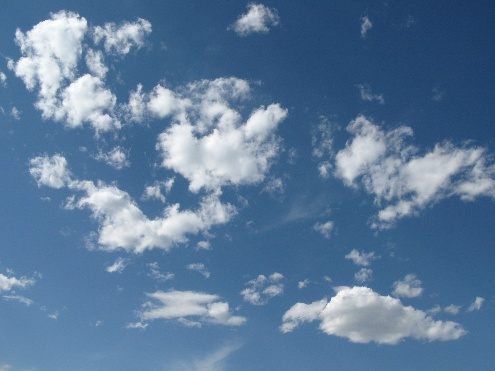

In [ ]:
from google.colab.patches import cv2_imshow
m = cv2.imread("/content/sky1.jpg") 
cv2_imshow(m)

116.05761671221595


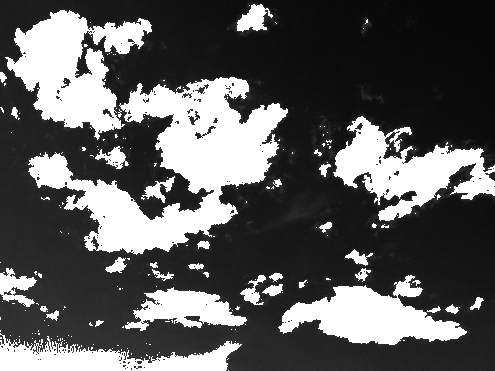

In [ ]:
h,w,bpp = np.shape(m)
red=[]
blue=[]
green=[]

for py in range(0,h):
 for px in range(0,w):
  red.append(m[py][px][0])
  blue.append(m[py][px][1])
  green.append(m[py][px][2]) 

red_max=max(red)
blue_max=max(blue)
green_max=max(green)
red_min=min(red)
blue_min=min(blue)
green_min=min(green) 

for py in range(0,h):
  for px in range(0,w):
    x=float(m[py][px][0])
    y=float(m[py][px][1])
    z=float(m[py][px][2])
    '''r=(x-red_min)*(1/(red_max-red_min)) 
    b=(y-blue_min)*(1/(blue_max-blue_min))
    g=(z-green_min)*(1/(green_max-green_min))'''
    m[py][px]=x*0.2126+y*0.0722+z*0.7152

m = (255 / 1) * (m / (255 / 1)) ** 2
h,w,bpp = np.shape(m)
n=np.zeros([h,w,bpp], dtype=np.uint8)
c=0
sum=0 

for py in range(0,h):
 for px in range(0,w):
  sum+=m[py][px][0]
  c+=1 

for py in range(0,h):
 for px in range(0,w):
  if m[py][px][0]>(sum/c):
    n[py][px]=m[py][px]
    m[py][px]=255 

sum1=0
z=0 

for py in range(0,h):
 for px in range(0,w):
  if n[py][px][0]!=0:
    sum1+=n[py][px][0]
    z+=1
mean=sum1/z 

print(mean) 
cv2_imshow(m)

In [ ]:
for i in range(len(means)):
 if mean>means[i]:
  v=i; 

if v!=len(means)-1:
 o1=means[v+1]-mean;
 o2=mean-means[v]; 
 if o1<o2:
  v=v+1;
  print(v) 
else:
 v=len(means)-1; 

print('current weather condition is:') 
if v==0:
 print('CLEAR SKY')
elif v==1:
 print('SUNNY')
elif v==2:
 print('CLOUDY AND SUNNY')
elif v==3:
 print('CLOUDY WITH CHANCES OF RAIN') 

current weather condition is:
CLOUDY AND SUNNY
